<a href="https://colab.research.google.com/github/AdamAnderB/Bramlett_DSPN_S24/blob/main/book/exercises/regularized-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment.


In [2]:
# WRITE YOUR CODE HERE
#install.packages("glmnet")
library(glmnet)
library(ggplot2)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-8

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [76]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [77]:
# WRITE YOUR CODE HERE
train_indices = sample(1:n, 50)
train_data = data.frame(x = x[train_indices], y = y[train_indices])
test_data = data.frame(x = x[-train_indices], y = y[-train_indices])
dim(test_data)
dim(train_data)

[1] 51  2

[1] 50  2

(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

> Add blockquote



`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


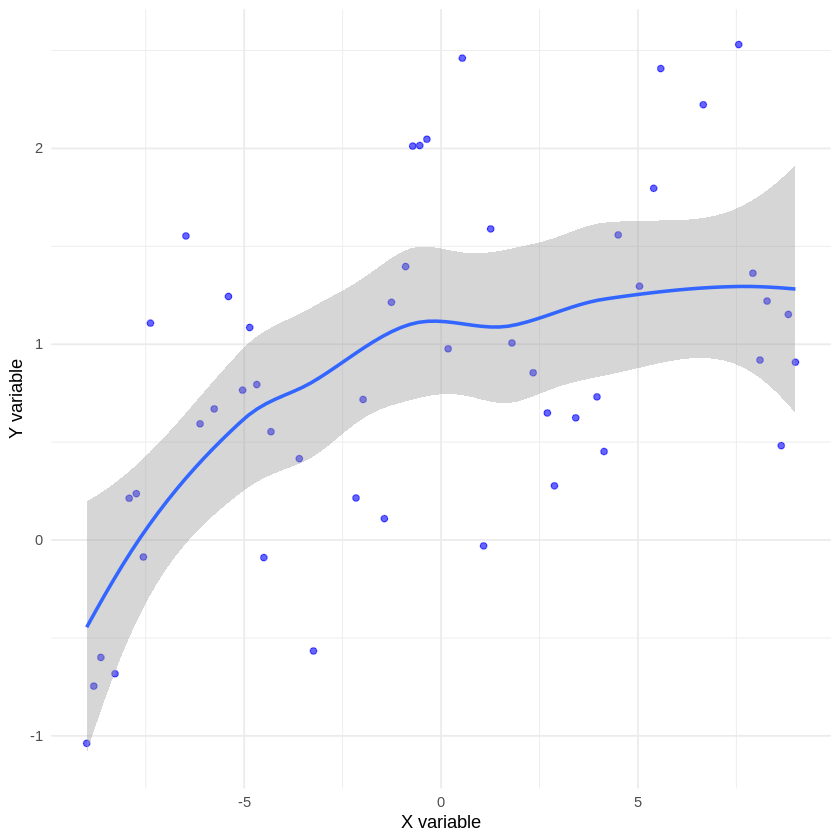

In [78]:
# WRITE YOUR CODE HERE
ggplot(train_data, aes(x=x, y=y))+
  geom_point(alpha=0.6, color="blue")+
  geom_smooth()+
  labs(
       x="X variable",
       y="Y variable")+
  theme_minimal()


How would you describe the relationship between $x$ and $y$ based on this plot?

> *Write your response here*
> the data appears to have a positive relationship that has a negative exponential curve added to it.

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results.


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*

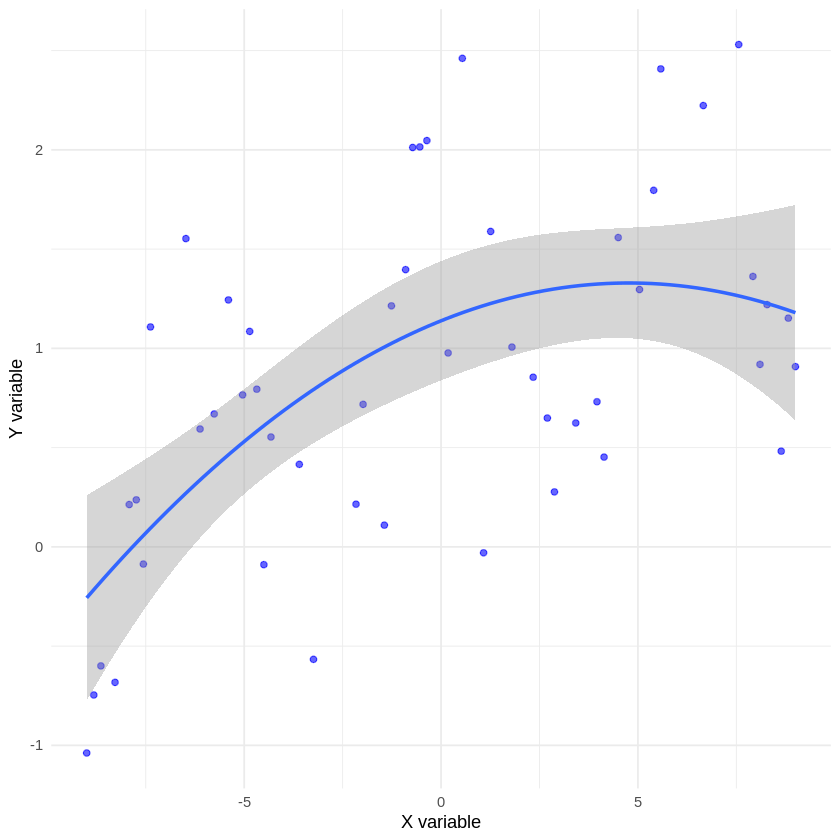

In [79]:
# WRITE YOUR CODE HERE
ggplot(train_data, aes(x=x, y=y))+
  geom_point(alpha=0.6, color="blue")+
  geom_smooth(method="lm", formula=y~poly(x, 2))+
  labs(
       x="X variable",
       y="Y variable")+
  theme_minimal()

:How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better?

> *Write your response here*
>

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?

> Add blockquote



[1] 50  2

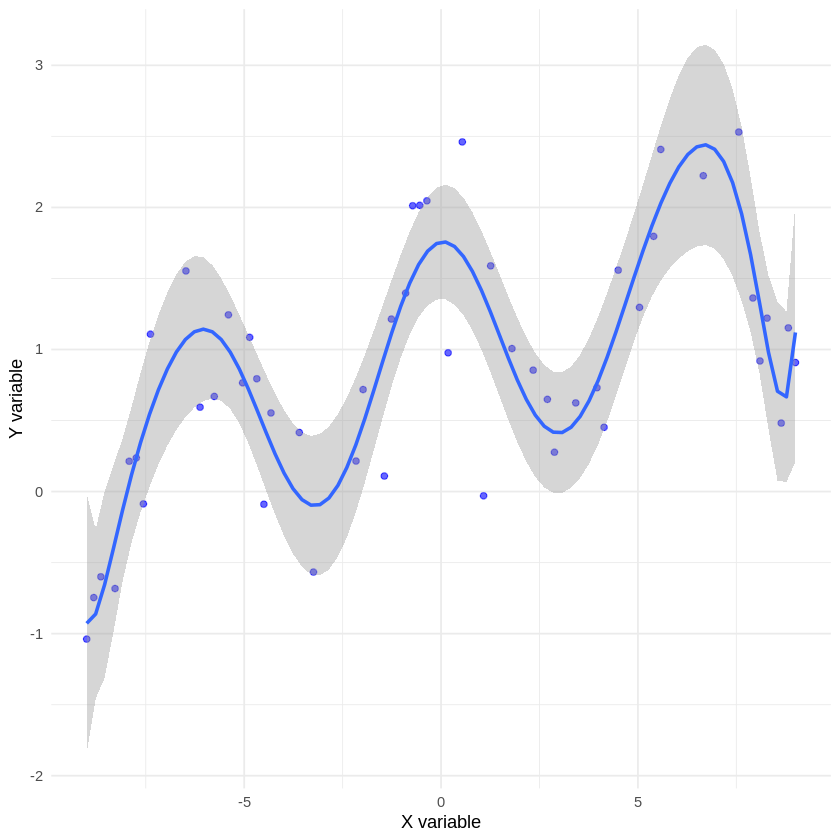

In [80]:
# WRITE YOUR CODE HERE
ggplot(train_data, aes(x=x, y=y))+
  geom_point(alpha=0.6, color="blue")+
  geom_smooth(method="lm", formula=y~poly(x, 12))+
  labs(
       x="X variable",
       y="Y variable")+
  theme_minimal()

dim(train_data)

*Write your response here*
> YES. Interestingly I thought this would be really really overfitted. But, it actually doesn't seem that crazy after you see it. It is prolly overfitting but, it fits the data impressively well.

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy.

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree.


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

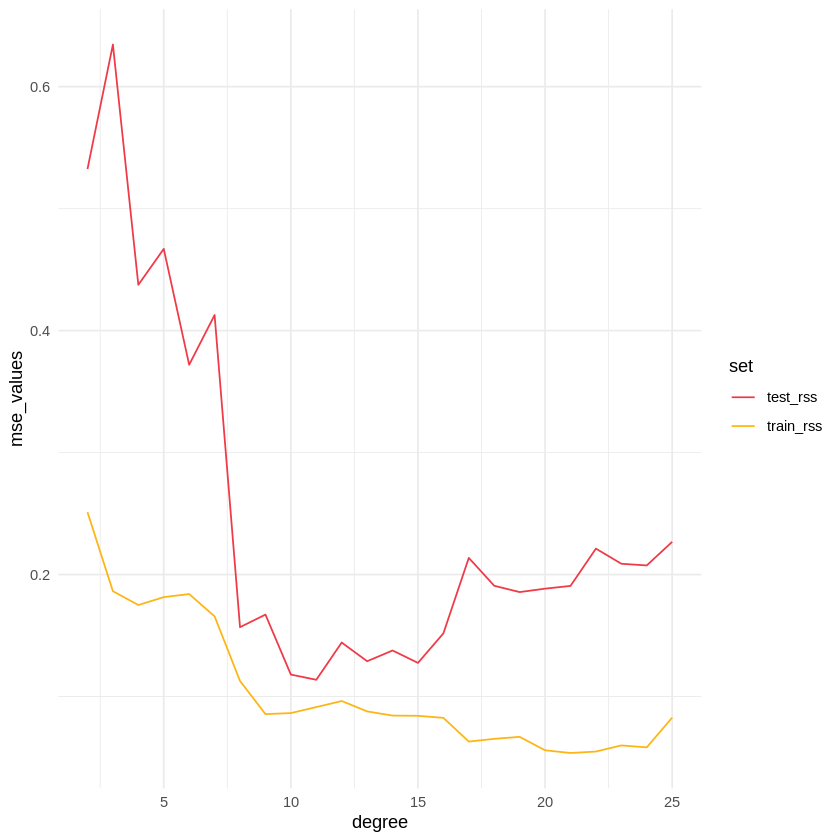

In [94]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,25)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    # WRITE YOUR CODE HERE
    model <- lm(y ~ poly(x, k), data=train_data)

    train_predictions <- predict(model, train_data)
    train_rss[k-1] <- median((train_predictions - train_data$y)^2)

    test_predictions <- predict(model, test_data)
    test_rss[k-1] <- median((test_predictions - test_data$y)^2)
}

# Plot your results here
# WRITE YOUR CODE HERE

df=data.frame(degree,train_rss,test_rss)
df<-df%>%
  pivot_longer(cols=c(train_rss,test_rss),
      names_to = "set",
      values_to="mse_values")

# Plot your results
ggplot(df, aes(x=degree)) +
  geom_line(aes(y=mse_values, color=set)) +
  theme_minimal() +
  scale_color_manual(values = c("#EF3A47", "#FDB515"))


What do you see as $k$ increase?

> *Write your response here*
> At first it goes down. Then it basically levels off with some noise between both the training and test set. after around 8 polys. However, I cannot do

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree.

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



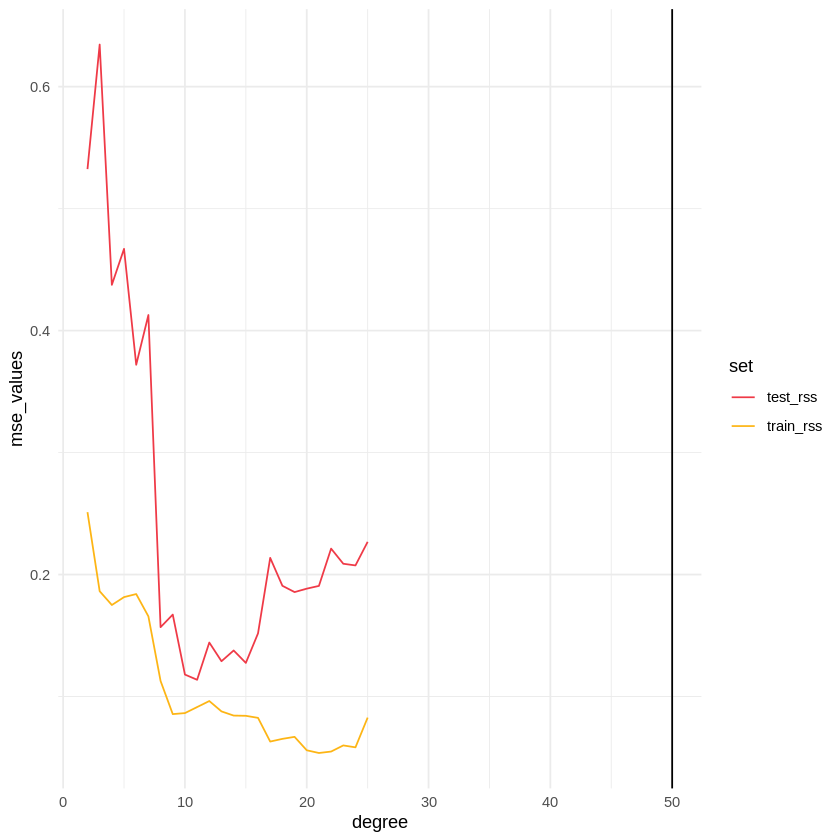

In [99]:
# WRITE YOUR CODE HERE
degree = seq(2,25)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    # WRITE YOUR CODE HERE
    model <- lm(y ~ poly(x, k), data=train_data)

    train_predictions <- predict(model, train_data)
    train_rss[k-1] <- median((train_predictions - train_data$y)^2)

    test_predictions <- predict(model, test_data)
    test_rss[k-1] <- median((test_predictions - test_data$y)^2)
}

# Plot your results here
# WRITE YOUR CODE HERE

df=data.frame(degree,train_rss,test_rss)
df<-df%>%
  pivot_longer(cols=c(train_rss,test_rss),
      names_to = "set",
      values_to="mse_values")

# Plot your results
ggplot(df, aes(x=degree)) +
  geom_line(aes(y=mse_values, color=set)) +
  theme_minimal() +
  scale_color_manual(values = c("#EF3A47", "#FDB515"))+
  geom_vline(xintercept = 50)


What do you see as $k$ gets larger than $n$?

> *Write your response here*
>

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time.

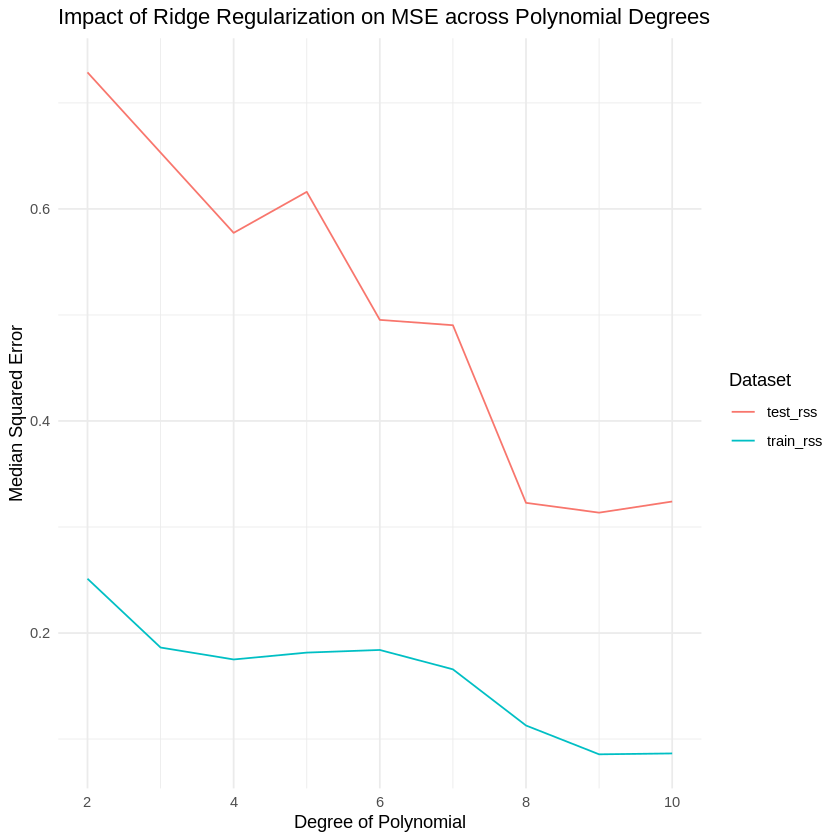

In [98]:
# Now do the variance-bias trade off analysis using ridge regression
lambda=0.00005
degree = seq(2,10)

rm(train_rss, test_rss)
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    # WRITE YOUR CODE HERE
    x_train_matrix <- model.matrix(~ poly(x, k), data = train_data)[, -1]
    x_test_matrix <- model.matrix(~ poly(x, k), data = test_data)[, -1]

    fit <- glmnet(x_train_matrix, train_data$y, alpha = 0, lambda = lambda)

    train_predictions <- predict(fit, s = lambda, newx = x_train_matrix)
    train_rss[k - 2 + 1] <- median((train_predictions - train_data$y)^2)

    test_predictions <- predict(fit, s = lambda, newx = x_test_matrix)
    test_rss[k - 2 + 1] <- median((test_predictions - test_data$y)^2)
}

# Plot your results here
# WRITE YOUR CODE HERE

results_df <- data.frame(degree, train_rss, test_rss) %>%
    pivot_longer(cols = c(train_rss, test_rss), names_to = "set", values_to = "mse")

# Plotting the results
ggplot(results_df, aes(x = degree, y = mse, color = set)) +
    geom_line()+
    theme_minimal()


What happens now when $k$ gets larger than $n$?

> *Write your response here*
>

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> *Write your response here*
> regularization changes the bias vairance trade off bias introducing a little bit of bias to achieve a significant reduction in variance (making them more generalizable).



---
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> *Write your response here*
>

**DUE:** 5pm EST, April 10, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*